# Building Types in Los Angeles 

By Keven Michel

For this assignment, I decided to create different maps for several areas in the Los Angeles County. Each map identifies the building types for that particular area. The areas chosen were: West Los Angeles, South Los Angeles, East Los Angeles and Pasadena, California. Since, Los Angeles County is large in area, it is difficult for the map to run so many buildings while also trying to identify each building. Which is why I decided to cut LA County into four quadrants to analyze a small sample of the building types in Los Angeles County. 

The purpose for this assignment is to have an understanding of the building types in certain parts of Los Angeles. The goal is to use this information and layer it over the census explortaion map that I have previously created. 




### Import Libraries

In [1]:
import osmnx as ox
import pandas as pd 
import geopandas as gpd 
import contextily as ctx
import matplotlib.pyplot as plt 


### Define Variables

In [2]:
ad = "South Los Angeles, California, United States" # defining the address 
tags = {"building":True}
dist = 2500
# Here I make South Los Angeles my variable, "ad," to help me identify the types of buildings within a 2500 radius. 

In [3]:
osm = ox.geometries_from_address(ad,
                                tags=tags,
                                dist=dist)

### Finding Building Types in South Los Angeles

In [4]:
osm.loc[osm["building"]=="yes","building"]="unassigned"

osm_building_counts = osm.building.value_counts().reset_index() # new variable, new dataframe 

osm_building_counts = osm_building_counts.rename(columns={"index":"building_type","building":"count"})
osm_building_counts


,building_type,count
0,house,24664
1,residential,5786
2,unassigned,4486
3,apartments,2684
4,retail,667
5,industrial,650
6,commercial,332
7,warehouse,306
8,hotel,83
9,school,64


The table shows all the building types within the 2500 radius in South Los Angeles. I produced this table to demonstrate how many medical facilities, in this case hospitals, are within this radius with respect to the residential households.

### Create Building Maps

In [5]:
def make_building_map(location = "South Los Angeles, California, United States", distance = 1500):
    osm = ox.geometries_from_address(location, 
                                    tags = {"building":True},
                                    dist = distance)
    osm_web_mercator = osm.to_crs(epsg=3857)
    fig, ax=plt.subplots(figsize = (10,10))
    osm_web_mercator.plot( ax = ax, 
                         figsize = (10,10),
                         column = "building",
                         cmap = "tab20",
                         legend = True, 
                         legend_kwds = {"loc":"upper left","bbox_to_anchor":(1,1)})
    ax.set_title("Building types in " + location)
    ax.axis("off")
    ctx.add_basemap(ax, source = ctx.providers.CartoDB.DarkMatter)

In [8]:
address_list = ["West Los Angeles, USA", 
                "South Los Angeles, USA", 
                "East Los Angeles, USA",
               "Pasadena, USA"]


The function is suppose to create a map, with location being South Los Angeles, however, it can also run other locations when typed in the "address_list." It also allows for the basemap to produce a dark backgroud. The out come I ended up with are four maps that represent different areas of Los Angeles County.

### Maps of Different Areas in the Los Angeles County 

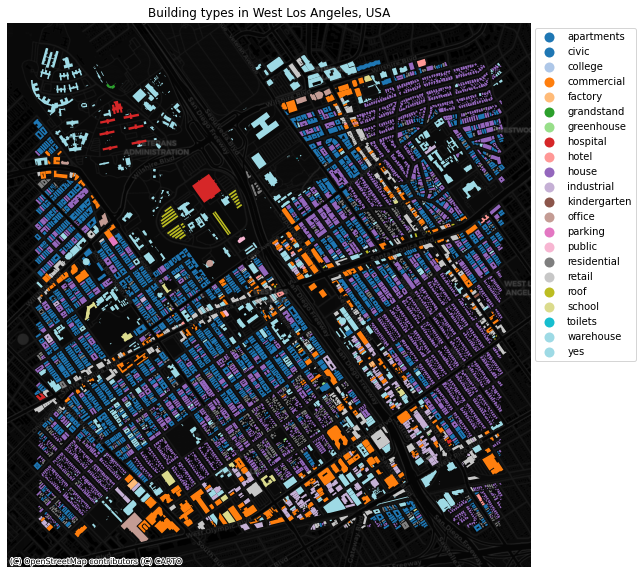

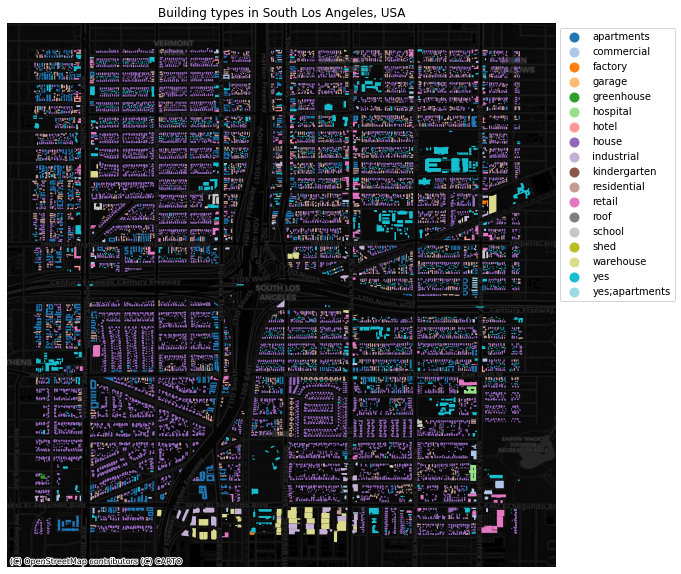

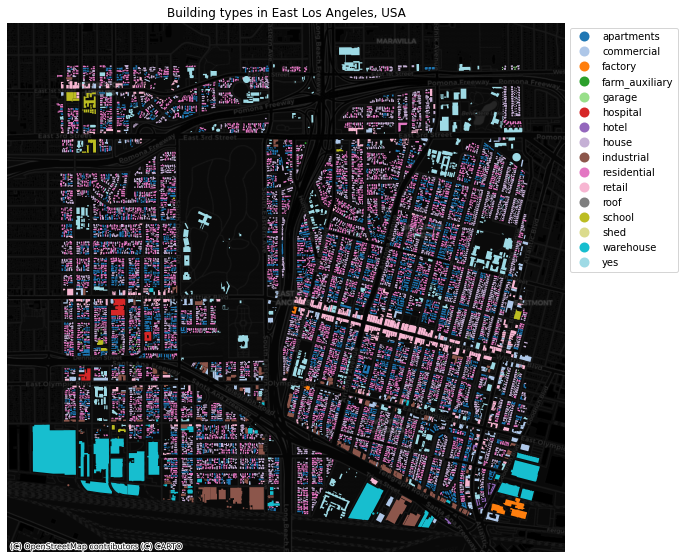

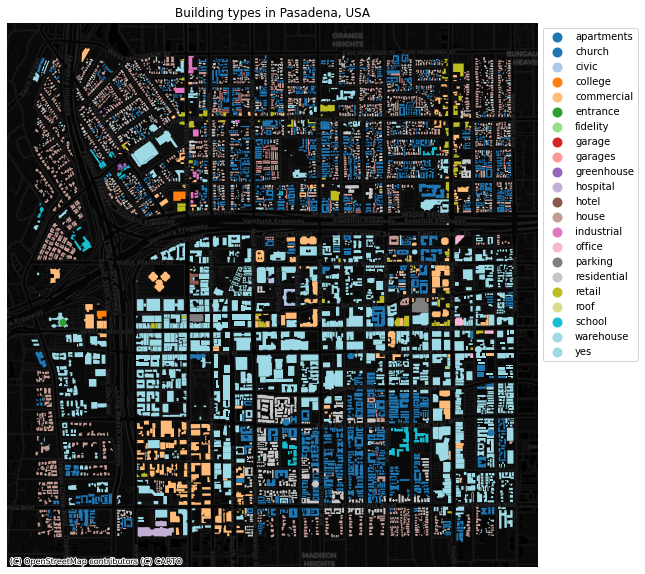

In [9]:
for ad in address_list: 
    make_building_map(ad)

<b> Scope </b>

Each map represents a different area in Los Angeles County. I did this due partly because LA County is a large county and contains many buildings that the code could not process so much. Which is why I broke the county into four areas: west, east, south and north (this is represented by Pasadena.) I do recognize that these four areas do not represent all of LA so taking a sample size would only help identify some answers for my research questions. 

<b> West Los Angeles </b>

Within this area, the legend on the side of the map identifies all the building types that exist within a 1500 radius of this location. My research question, in regards to the project scope, is to identify how many medical facilities exist within this radius. Although the building map is large and the items are tiny, I was able to identify some medical facilities within this radius compared to the residential buildings. 

<b> South Los Angeles </b>

Compared to South Los Angeles, the number of hospitals in this area is much smaller compared to the hospitals found in the West Los Angeles map. Visually, hospitals are least shown in the South LA map compared to the West map. There does exist a large number of residential buildings and much more of a mix of retail and other industrial buildings. 

<b> East Los Angeles </b>

In the East LA map, we can see there exist some medicial facilities with respect to the residential buildings in this radius. We can also identify how these facilities are further away to some parts of the area with commerical and industrial buildings mixed in. 

<b> Pasadena </b>

I chose Pasadena, California because it is directly north from South LA and because it was difficult to pick an exact northern part of LA county. This map is a good example of where more warehouses are located in this part of Los Angeles, even though it is a small sample size. There is also a little less residential compared to the rest of the maps we have looked at so far. 

## Conclusion 

After developing these maps, we can identify the number of buildings and building types that are located within certain areas of LA County. The purpose of this now is to take this information and adapt it to my current maps that focus on racial profiles within Los Angeles County. This will allow me to gain further insights and hopefully answer my research inquiries.